### EDA DISTRIBUCION VOLA

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

#viejo dataset
df = pd.read_csv("../../data/outputs/dataset.csv", sep=";", index_col=0, parse_dates=["date"])

## EDA con datos de mercado

In [2]:
activos = pd.read_pickle("../../data/outputs/activos_closes.pkl")

In [3]:
rent_activos = np.log(activos).diff()

### Sin look-ahead

Le añadadimos el closed=left para que no incorpore ninguna información del último día de cálculo de la ventana.

In [4]:
old_window_vola = rent_activos.rolling(20, closed='left').std().shift(20)

In [122]:
new_windo_vola = rent_activos.rolling(20, closed='left').std()

In [123]:
abs_pct_change = (np.abs(new_windo_vola - old_window_vola)/old_window_vola)

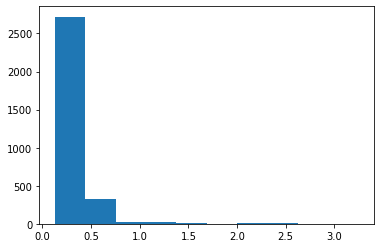

In [124]:
plt.hist(abs_pct_change.mean(axis=1).dropna())
plt.show()

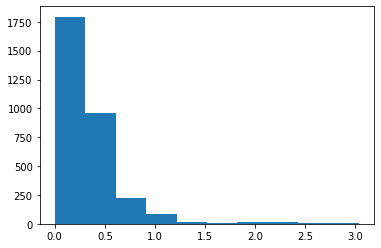

In [125]:
plt.hist(abs_pct_change.TEF)
plt.show()

Para cada ticker y cada día, el percentil 75 sobre la diferencia porcentual absoluta entre volatilidades futuras a 20 días roladas y pasadas a 20 días roladas. Para cada día y ticker se pueden tomar estos valores y tenemos un umbral de vola dinámico para definir si hay un incremento/decremento significativo o no para asignar la label final.

In [126]:
umbral_q75 = abs_pct_change.rolling(20).quantile(0.75)
umbral_q75


,ABE,ABG,ABG.P_0,ABG.P_1,ACS,ACX,ACX_0,AENA,ALM,AMS,...,SAN,SCYR_1,SGRE,SGRE_0,SLR,TEF,TL5,TRE,VIS,VIS_0
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-06,NaN,NaN,NaN,NaN,0.421675,0.419135,NaN,0.524863,0.457195,0.354128,...,0.460931,NaN,0.455181,NaN,0.334868,0.475037,NaN,NaN,NaN,NaN
2022-05-09,NaN,NaN,NaN,NaN,0.421675,0.419135,NaN,0.524863,0.457195,0.354128,...,0.460931,NaN,0.455181,NaN,0.373388,0.475037,NaN,NaN,NaN,NaN
2022-05-10,NaN,NaN,NaN,NaN,0.421675,0.419135,NaN,0.524863,0.457195,0.354128,...,0.460931,NaN,0.449205,NaN,0.373388,0.475037,NaN,NaN,NaN,NaN
2022-05-11,NaN,NaN,NaN,NaN,0.421675,0.419135,NaN,0.524863,0.457195,0.354128,...,0.460931,NaN,0.442219,NaN,0.376083,0.475037,NaN,NaN,NaN,NaN


Si queremos ver los umbrales para un ticker, tienen esta pinta. Hay épocas en las que una variación del 15% está en el cuartil 75 entre la vola hacia atrás y hacia adelante en 20 días rolados. En cambio en 2022, está entorno a un 52%.

In [128]:
umbral_q75.AENA.dropna()

2015-09-14    0.155638
2015-09-15    0.145787
2015-09-16    0.133021
2015-09-17    0.099254
2015-09-18    0.133021
                ...   
2022-05-06    0.524863
2022-05-09    0.524863
2022-05-10    0.524863
2022-05-11    0.524863
2022-05-12    0.524863
Name: AENA, Length: 1705, dtype: float64

### Con look-ahead -> Para calcular las labels

In [5]:
old_window_vola = rent_activos.rolling(20).std()

In [6]:
new_windo_vola = rent_activos.rolling(20).std().shift(-20)

In [7]:
abs_pct_change = (np.abs(new_windo_vola - old_window_vola)/old_window_vola)

In [25]:
pct_change = (new_windo_vola - old_window_vola)/old_window_vola

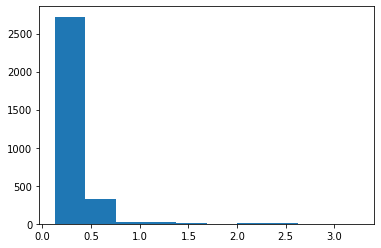

In [132]:
plt.hist(abs_pct_change.mean(axis=1).dropna())
plt.show()

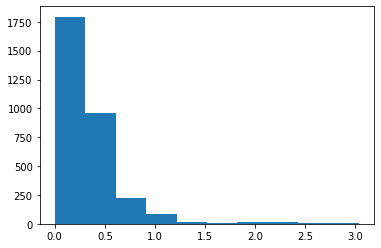

In [133]:
plt.hist(abs_pct_change.TEF)
plt.show()

Para cada ticker y cada día, el percentil 75 sobre la diferencia porcentual absoluta entre volatilidades futuras a 20 días roladas y pasadas a 20 días roladas. Para cada día y ticker se pueden tomar estos valores y tenemos un umbral de vola dinámico para definir si hay un incremento/decremento significativo o no para asignar la label final.

In [134]:
umbral_q75 = abs_pct_change.rolling(20).quantile(0.75)
umbral_q75


,ABE,ABG,ABG.P_0,ABG.P_1,ACS,ACX,ACX_0,AENA,ALM,AMS,...,SAN,SCYR_1,SGRE,SGRE_0,SLR,TEF,TL5,TRE,VIS,VIS_0
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Si queremos ver los umbrales para un ticker, tienen esta pinta. Hay épocas en las que una variación del 15% está en el cuartil 75 entre la vola hacia atrás y hacia adelante en 20 días rolados. En cambio en 2022, está entorno a un 52%.

In [135]:
umbral_q75.AENA.dropna()

2015-08-14    0.155638
2015-08-17    0.145787
2015-08-18    0.133021
2015-08-19    0.099254
2015-08-20    0.133021
                ...   
2022-04-06    0.524863
2022-04-07    0.524863
2022-04-08    0.524863
2022-04-11    0.524863
2022-04-12    0.524863
Name: AENA, Length: 1706, dtype: float64

In [ ]:
abs_pct_change.shape

(3162, 65)

In [ ]:
(-abs_pct_change.TEF.rolling(20).quantile(0.75) > pct_change.TEF).sum()

338

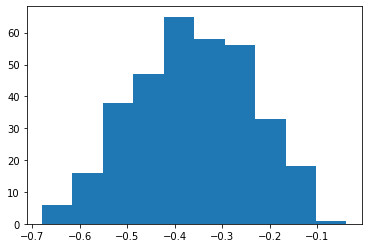

In [29]:
plt.hist(pct_change.TEF[(-abs_pct_change.TEF.rolling(20).quantile(0.75) > pct_change.TEF)])
plt.show()

In [ ]:
(abs_pct_change.TEF.rolling(20).quantile(0.75) < pct_change.TEF).sum()

572

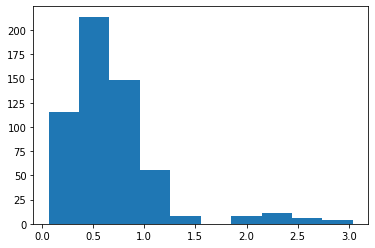

In [31]:
plt.hist(pct_change.TEF[(abs_pct_change.TEF.rolling(20).quantile(0.75) < pct_change.TEF)])
plt.show()

In [35]:
(pct_change.TEF.rolling(20).quantile(0.75) < pct_change.TEF).sum()

1138

(array([163., 399., 302., 179.,  59.,   7.,   4.,  14.,   7.,   4.]),
 array([-0.44137429, -0.09326339,  0.25484752,  0.60295842,  0.95106932,
         1.29918022,  1.64729112,  1.99540203,  2.34351293,  2.69162383,
         3.03973473]),
 <BarContainer object of 10 artists>)

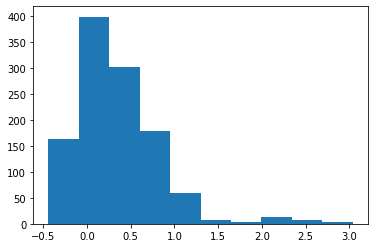

In [37]:
plt.hist(pct_change.TEF[(pct_change.TEF.rolling(20).quantile(0.75) < pct_change.TEF)])

In [36]:
(pct_change.TEF.rolling(20).quantile(0.25) > pct_change.TEF).sum()

1012

(array([189., 398., 280.,  99.,  29.,   5.,   5.,   2.,   0.,   5.]),
 array([-0.67943181, -0.42830552, -0.17717922,  0.07394708,  0.32507338,
         0.57619967,  0.82732597,  1.07845227,  1.32957856,  1.58070486,
         1.83183116]),
 <BarContainer object of 10 artists>)

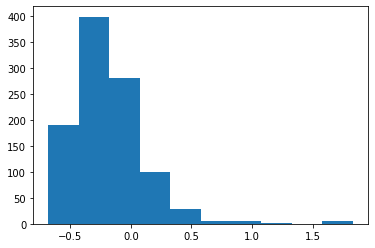

In [38]:
plt.hist(pct_change.TEF[(pct_change.TEF.rolling(20).quantile(0.25) > pct_change.TEF)])

## EDA sobre los datos de noticias

In [2]:
df.columns

Index(['ticker', 'sector', 'subsector', 'date', 'title', 'body',
       'rd_activo_news', 'rd_bench_news', 'alpha_exante', 'alpha_exante_Q2',
       'alpha_exante_Q3', 'alpha_expost', 'alpha_expost_Q2',
       'alpha_expost_Q3alpha_expost', 'alpha_expost_label', 'vola20_exante',
       'vola20_expost', 'vola20_diff', 'vola20_umbral', 'vola_label_calc',
       'topic', 'topic_duda', 'finanzas_s_n', 'finanzas_s_n_duda',
       'impacto_s_n', 'impacto_s_n_duda'],
      dtype='object')

<AxesSubplot:>

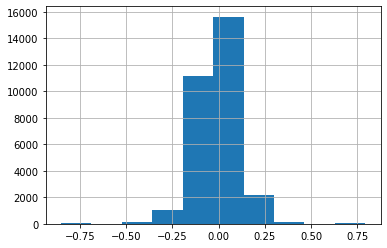

In [3]:
df.vola20_diff.hist()

In [4]:
new_vola_diff = abs(df["vola20_expost"] - df["vola20_exante"]) / df["vola20_exante"]

In [6]:
new_vola_diff

36284    0.387168
23026    0.195779
32912    0.089083
4142     0.186149
20395    0.153457
           ...   
32852    0.395823
20327    0.557113
30344    0.003468
15086    0.095587
37647    0.212910
Length: 30449, dtype: float64

<AxesSubplot:>

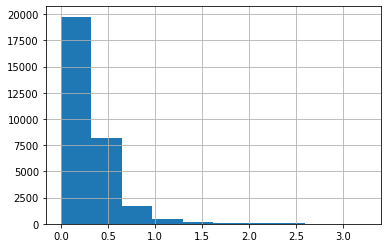

In [5]:
new_vola_diff.hist()

In [11]:
#de la original, no de la new
df.vola20_diff.quantile(0.8)
df.vola20_diff.quantile(0.2)

-0.0824267709345254

In [13]:
df.shape

(30449, 26)

In [12]:
df.loc[df.vola20_diff>df.vola20_diff.quantile(0.8)]

,ticker,sector,subsector,date,title,body,rd_activo_news,rd_bench_news,alpha_exante,alpha_exante_Q2,...,vola20_expost,vola20_diff,vola20_umbral,vola_label_calc,topic,topic_duda,finanzas_s_n,finanzas_s_n_duda,impacto_s_n,impacto_s_n_duda
4460,SAB,Servicios Financieros,Bancos y Cajas de Ahorro,2021-03-03 06:08:47,La banca española une fuerzas y crea un ‘marke...,La banca española ha decidido sumar fuerzas pa...,0.004017,0.004997,-0.012427,-0.029489,...,0.494811,0.149027,0.093263,-1.0,NaN,NaN,NaN,NaN,NaN,NaN
32615,BBVA,Servicios Financieros,Bancos y Cajas de Ahorro,2021-06-17 15:15:00,U-Ranking sitúa a la UPO de Sevilla entre las ...,"SEVILLA, 17 Jun. (EUROPA PRESS) -<EOL>La noven...",0.006879,0.001845,0.012379,-0.014319,...,0.332455,0.162072,0.080959,-1.0,NaN,NaN,NaN,NaN,NaN,NaN
23294,IDR,Tecnología y Telecomunicaciones,Electrónica y Software,2021-12-14 19:09:48,"SAPA, la empresa vasca de defensa, compra a Co...",Movimiento de calado en el grupo tecnológico e...,-0.015267,-0.000457,0.003133,-0.017262,...,0.442909,0.229158,0.079289,-1.0,NaN,NaN,NaN,NaN,NaN,NaN
22414,SAN,Servicios Financieros,Bancos y Cajas de Ahorro,2021-04-14 22:54:09,Northland desembarca en España con la compra d...,La empresa canadiense Northland Power ha anunc...,-0.001032,0.001890,0.000074,-0.017414,...,0.335312,0.110686,0.080756,-1.0,NaN,NaN,NaN,NaN,NaN,NaN
37693,IAG,Servicios de Consumo,Transporte y Distribución,2021-06-21 06:08:59,Berthold Fuerst: “Veremos más salidas a Bolsa ...,"España es un hervidero de operaciones, con sal...",-0.012158,-0.006910,-0.000886,-0.031653,...,0.407464,0.091860,0.099175,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23200,FER,"Mat.Basicos, Industria y Construcción",Construcción,2021-11-13 09:43:36,"Chris Hohn, el activista que pasó de pensar en...","Implacable en los consejos de administración, ...",0.000759,-0.005459,-0.000747,-0.012784,...,0.409975,0.224230,0.060026,-1.0,NaN,NaN,NaN,NaN,NaN,NaN
42101,SAN,Servicios Financieros,Bancos y Cajas de Ahorro,2021-11-24 17:03:00,"Bodegas Muga, premio PYME del año de La Rioja","LOGROÑO, 24 Nov. (EUROPA PRESS) -<EOL>El Premi...",-0.007230,-0.003651,-0.004456,-0.023675,...,0.440784,0.225635,0.080756,-1.0,NaN,NaN,NaN,NaN,NaN,NaN
41875,NTGY,Petróleo y Energía,Electricidad y Gas,2021-09-25 03:45:00,El gasoducto submarino Medgaz supera por prime...,El ejercicio 2020 fue el más rentable para Med...,0.000000,0.005891,-0.004499,-0.008938,...,0.289101,0.196410,0.056953,-1.0,NaN,NaN,NaN,NaN,NaN,NaN
8910,IBE,Petróleo y Energía,Electricidad y Gas,2021-09-06 20:38:04,La Xunta aprovecha la crisis de los embalses p...,De «disparate medioambiental» ha calificado el...,-0.001441,0.000889,-0.013722,-0.011126,...,0.257247,0.120673,0.052808,-1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
df.loc[df.vola20_diff>df.vola20_diff.quantile(0.8)].shape[0]/df.shape[0]

0.19994088475812014

In [14]:
df.loc[df.vola20_diff<df.vola20_diff.quantile(0.2)]

,ticker,sector,subsector,date,title,body,rd_activo_news,rd_bench_news,alpha_exante,alpha_exante_Q2,...,vola20_expost,vola20_diff,vola20_umbral,vola_label_calc,topic,topic_duda,finanzas_s_n,finanzas_s_n_duda,impacto_s_n,impacto_s_n_duda
36284,TEF,Tecnología y Telecomunicaciones,Telecomunicaciones y Otros,2021-12-21 14:11:20,Telefónica y los sindicatos acercan posturas e...,Telefónica España y los sindicatos UGT y CC OO...,0.005175,0.005872,-0.000566,-0.024108,...,0.170079,-0.107451,0.059450,1.0,NaN,NaN,NaN,NaN,NaN,NaN
46268,SAN,Servicios Financieros,Bancos y Cajas de Ahorro,2021-02-25 10:03:43,Aurora Intelligent Nutrition se convierte en l...,"La tradición adaptada a los nuevos tiempos, es...",-0.008228,-0.001650,-0.004372,-0.017414,...,0.260564,-0.117028,0.080756,1.0,NaN,NaN,NaN,NaN,NaN,NaN
39802,IBE,Petróleo y Energía,Electricidad y Gas,2021-03-22 13:35:00,"Reyes Maroto anima a Aragón a presentar un ""pr...","ZARAGOZA, 22 Mar. (EUROPA PRESS) -<EOL>La mini...",-0.003700,-0.010360,-0.004017,-0.018112,...,0.170457,-0.092551,0.052808,1.0,NaN,NaN,NaN,NaN,NaN,NaN
19070,IBE,Petróleo y Energía,Electricidad y Gas,2021-01-13 21:02:00,El Atlético resiste el asedio del Barcelona y ...,Cuando se trata de un Atlético de Madrid – Bar...,0.000413,-0.000163,0.008085,-0.013120,...,0.139268,-0.089275,0.052808,1.0,NaN,NaN,NaN,NaN,NaN,NaN
17007,SAN,Servicios Financieros,Bancos y Cajas de Ahorro,2021-12-10 11:27:12,Banco Santander pierde el juicio contra Orcel ...,Sorpresa en el Banco Santander. El juzgado de ...,0.000370,0.001356,0.001897,-0.023675,...,0.213215,-0.171485,0.080756,1.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32665,TEF,Tecnología y Telecomunicaciones,Telecomunicaciones y Otros,2021-01-21 17:06:00,Competencia de Reino Unido centrará su investi...,"MADRID, 21 Ene. (EUROPA PRESS) -<EOL>La Autori...",-0.028435,-0.013993,-0.002902,-0.029410,...,0.258875,-0.164942,0.059450,1.0,NaN,NaN,NaN,NaN,NaN,NaN
53799,BBVA,Servicios Financieros,Bancos y Cajas de Ahorro,2021-04-30 06:12:34,Santander crea una sociedad para gestionar las...,"Banco Santander acaba de crear RetailCo, una n...",-0.002200,0.001023,0.006273,-0.024517,...,0.224121,-0.111688,0.080959,1.0,NaN,NaN,NaN,NaN,NaN,NaN
29638,REP,Petróleo y Energía,Petróleo,2021-02-16 16:08:52,Repsol Ibereólica Renovables cierra la venta d...,"Repsol Ibereólica Renovables Chile, sociedad p...",0.001701,-0.007506,0.002538,-0.022262,...,0.275682,-0.092279,0.071664,1.0,NaN,NaN,NaN,NaN,NaN,NaN
36308,BKT,Servicios Financieros,Bancos y Cajas de Ahorro,2021-07-22 13:45:00,Corporate y M&A.- Bankinter descarta recortar ...,"MADRID, 22 Jul. (EUROPA PRESS) -<EOL>La consej...",0.007329,0.002066,0.004290,-0.015681,...,0.199262,-0.098463,0.080858,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df.loc[df.vola20_diff<df.vola20_diff.quantile(0.2)].shape[0]/df.shape[0]

0.1999737265591645

##### VOLA ENVENTANDA

In [23]:
df["umbral_sup"] = df.vola20_diff.rolling(20).quantile(0.8)
df["umbral_sup"]

36284         NaN
23026         NaN
32912         NaN
4142          NaN
20395         NaN
           ...   
32852    0.057366
20327    0.126272
30344    0.057366
15086    0.057366
37647    0.057366
Name: umbral_sup, Length: 30449, dtype: float64

In [24]:
df["umbral_inf"] = df.vola20_diff.rolling(20).quantile(0.2)
df["umbral_inf"]

36284         NaN
23026         NaN
32912         NaN
4142          NaN
20395         NaN
           ...   
32852   -0.080652
20327   -0.080652
30344   -0.080652
15086   -0.080652
37647   -0.080652
Name: umbral_inf, Length: 30449, dtype: float64

In [25]:
df.loc[df.vola20_diff>df.umbral_sup]

,ticker,sector,subsector,date,title,body,rd_activo_news,rd_bench_news,alpha_exante,alpha_exante_Q2,...,vola20_umbral,vola_label_calc,topic,topic_duda,finanzas_s_n,finanzas_s_n_duda,impacto_s_n,impacto_s_n_duda,umbral_sup,umbral_inf
11194,ELE,Petróleo y Energía,Electricidad y Gas,2021-07-07 13:00:00,Endesa destina más de 700.000 euros a mejorar ...,"JAÉN, 7 Jul. (EUROPA PRESS) -<EOL>Endesa ha de...",0.013158,-0.002853,0.002726,-0.015371,...,0.055580,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.018953,-0.063624
23294,IDR,Tecnología y Telecomunicaciones,Electrónica y Software,2021-12-14 19:09:48,"SAPA, la empresa vasca de defensa, compra a Co...",Movimiento de calado en el grupo tecnológico e...,-0.015267,-0.000457,0.003133,-0.017262,...,0.079289,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.016563,-0.063624
22414,SAN,Servicios Financieros,Bancos y Cajas de Ahorro,2021-04-14 22:54:09,Northland desembarca en España con la compra d...,La empresa canadiense Northland Power ha anunc...,-0.001032,0.001890,0.000074,-0.017414,...,0.080756,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.014530,-0.056842
37693,IAG,Servicios de Consumo,Transporte y Distribución,2021-06-21 06:08:59,Berthold Fuerst: “Veremos más salidas a Bolsa ...,"España es un hervidero de operaciones, con sal...",-0.012158,-0.006910,-0.000886,-0.031653,...,0.099175,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.016563,-0.055855
33828,ELE,Petróleo y Energía,Electricidad y Gas,2021-02-18 14:09:00,Endesa refuerza sus infraestructuras en Chauch...,"CHAUCHINA (GRANADA), 18 Feb. (EUROPA PRESS) -<...",-0.011429,-0.009032,0.006027,-0.020379,...,0.055580,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.026189,-0.071491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23200,FER,"Mat.Basicos, Industria y Construcción",Construcción,2021-11-13 09:43:36,"Chris Hohn, el activista que pasó de pensar en...","Implacable en los consejos de administración, ...",0.000759,-0.005459,-0.000747,-0.012784,...,0.060026,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.075535,-0.080499
42101,SAN,Servicios Financieros,Bancos y Cajas de Ahorro,2021-11-24 17:03:00,"Bodegas Muga, premio PYME del año de La Rioja","LOGROÑO, 24 Nov. (EUROPA PRESS) -<EOL>El Premi...",-0.007230,-0.003651,-0.004456,-0.023675,...,0.080756,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.052885,-0.080353
41875,NTGY,Petróleo y Energía,Electricidad y Gas,2021-09-25 03:45:00,El gasoducto submarino Medgaz supera por prime...,El ejercicio 2020 fue el más rentable para Med...,0.000000,0.005891,-0.004499,-0.008938,...,0.056953,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.052885,-0.080652
8910,IBE,Petróleo y Energía,Electricidad y Gas,2021-09-06 20:38:04,La Xunta aprovecha la crisis de los embalses p...,De «disparate medioambiental» ha calificado el...,-0.001441,0.000889,-0.013722,-0.011126,...,0.052808,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.111229,-0.068811


In [26]:
df.loc[df.vola20_diff<df.umbral_inf]

,ticker,sector,subsector,date,title,body,rd_activo_news,rd_bench_news,alpha_exante,alpha_exante_Q2,...,vola20_umbral,vola_label_calc,topic,topic_duda,finanzas_s_n,finanzas_s_n_duda,impacto_s_n,impacto_s_n_duda,umbral_sup,umbral_inf
19070,IBE,Petróleo y Energía,Electricidad y Gas,2021-01-13 21:02:00,El Atlético resiste el asedio del Barcelona y ...,Cuando se trata de un Atlético de Madrid – Bar...,0.000413,-0.000163,0.008085,-0.013120,...,0.052808,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.014530,-0.069119
17007,SAN,Servicios Financieros,Bancos y Cajas de Ahorro,2021-12-10 11:27:12,Banco Santander pierde el juicio contra Orcel ...,Sorpresa en el Banco Santander. El juzgado de ...,0.000370,0.001356,0.001897,-0.023675,...,0.080756,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.016563,-0.069119
48999,ITX,Bienes de Consumo,"Textil, Vestido y Calzado",2021-07-29 18:34:06,Amancio Ortega compra un 5% de REE para ser se...,Amancio Ortega ha comunicado a la CNMV que ha ...,-0.004551,-0.005800,-0.003679,-0.019605,...,0.061497,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.026189,-0.071491
44972,IBE,Petróleo y Energía,Electricidad y Gas,2021-03-24 16:17:00,Extremadura albergará la primera fábrica de ce...,Extremadura albergará la primera planta de cel...,-0.004111,0.011137,0.000320,-0.018112,...,0.052808,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.019144,-0.046750
28822,BBVA,Servicios Financieros,Bancos y Cajas de Ahorro,2021-04-19 06:07:56,BBVA se lanza al negocio de grandes patrimonio...,El negocio de la banca de grandes patrimonios ...,0.004003,-0.000131,-0.008270,-0.024517,...,0.080959,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.012335,-0.046750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32665,TEF,Tecnología y Telecomunicaciones,Telecomunicaciones y Otros,2021-01-21 17:06:00,Competencia de Reino Unido centrará su investi...,"MADRID, 21 Ene. (EUROPA PRESS) -<EOL>La Autori...",-0.028435,-0.013993,-0.002902,-0.029410,...,0.059450,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.057976,-0.080499
53799,BBVA,Servicios Financieros,Bancos y Cajas de Ahorro,2021-04-30 06:12:34,Santander crea una sociedad para gestionar las...,"Banco Santander acaba de crear RetailCo, una n...",-0.002200,0.001023,0.006273,-0.024517,...,0.080959,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.075535,-0.080499
29638,REP,Petróleo y Energía,Petróleo,2021-02-16 16:08:52,Repsol Ibereólica Renovables cierra la venta d...,"Repsol Ibereólica Renovables Chile, sociedad p...",0.001701,-0.007506,0.002538,-0.022262,...,0.071664,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.052885,-0.080336
36308,BKT,Servicios Financieros,Bancos y Cajas de Ahorro,2021-07-22 13:45:00,Corporate y M&A.- Bankinter descarta recortar ...,"MADRID, 22 Jul. (EUROPA PRESS) -<EOL>La consej...",0.007329,0.002066,0.004290,-0.015681,...,0.080858,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.034994,-0.092296


##### COMPARAMOS CON EL VIEJO CALCULO

In [30]:
df2 = df.loc[df.vola20_diff<df.umbral_inf]
df2.loc[df2.vola_label_calc<1]

,ticker,sector,subsector,date,title,body,rd_activo_news,rd_bench_news,alpha_exante,alpha_exante_Q2,...,vola20_umbral,vola_label_calc,topic,topic_duda,finanzas_s_n,finanzas_s_n_duda,impacto_s_n,impacto_s_n_duda,umbral_sup,umbral_inf
38428,MAP,Servicios Financieros,Seguros,2021-04-23 10:19:00,Mapfre y entidades de Swiss Life Group crean u...,"MADRID, 23 Abr. (EUROPA PRESS) -<EOL>Mapfre y ...",0.012658,-0.001257,-0.002789,-0.021779,...,0.071037,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.061004,-0.046202
50093,CABK,Servicios Financieros,Bancos y Cajas de Ahorro,2021-09-29 19:03:00,CaixaBank analiza las oportunidades que los fo...,"BARCELONA, 29 Sep. (EUROPA PRESS) -<EOL>CaixaB...",0.005160,0.007565,0.000629,-0.017693,...,0.082036,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.076429,-0.043170
15814,SAB,Servicios Financieros,Bancos y Cajas de Ahorro,2021-08-12 03:29:00,Podemos prepara el rearme de su endeble estruc...,El nuevo Podemos de Ione Belarra no ha esperad...,0.001939,-0.000291,0.002232,-0.036874,...,0.093263,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.073476,-0.061293
6412,SAB,Servicios Financieros,Bancos y Cajas de Ahorro,2021-10-05 18:31:00,Banco Sabadell transmite a Morabanc toda su pa...,MoraBanc se convierte en el accionista mayorit...,-0.003028,-0.005319,0.002478,-0.021960,...,0.093263,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.073476,-0.062702
10815,ANA,"Mat.Basicos, Industria y Construcción",Construcción,2021-10-07 20:23:00,Rahm y García Rodríguez siguen la estela en el...,"MADRID, 7 Oct. (EUROPA PRESS) -<EOL>El golfist...",-0.006296,0.001168,-0.002167,-0.014111,...,0.072651,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.085817,-0.046863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30830,CABK,Servicios Financieros,Bancos y Cajas de Ahorro,2021-10-18 11:09:13,"Así serán los resultados de Santander, BBVA, C...",A punto de arrancar la temporada de resultados...,-0.013647,-0.005164,0.000559,-0.019023,...,0.082036,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.090788,-0.056229
6110,ELE,Petróleo y Energía,Electricidad y Gas,2021-02-03 17:28:00,"Endesa acomete medidas ""de refuerzo"" en Los Re...","SEVILLA, 3 Feb. (EUROPA PRESS) -<EOL>Tras los ...",0.010597,-0.004832,-0.004915,-0.024223,...,0.055580,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.066161,-0.042427
56371,IBE,Petróleo y Energía,Electricidad y Gas,2021-03-31 18:57:00,El Barça está en semifinales de 'Champions' pe...,Las blaugranas hicieron valer el 3-0 de la ida...,0.001365,0.001814,0.008879,-0.018667,...,0.052808,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.065341,-0.042032
5935,NTGY,Petróleo y Energía,Electricidad y Gas,2021-12-03 11:43:00,La Plataforma enerTIC.org premia a los proyect...,"MADRID, 3 Dic. (Portaltic/EP) -<EOL>La IX edic...",0.000408,-0.015824,-0.002277,-0.011636,...,0.056953,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.080787,-0.045542
